In [41]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [42]:
df=pd.read_csv("Q:\\vasanth_ML\\customer dataset.csv")
df

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
df["Gender"]=encoder.fit_transform(df[["Gender"]]).toarray()
df
df.Gender=df.Gender.astype(int)
df

In [44]:
df.shape

(200, 5)

In [4]:
df.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

In [5]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [6]:
df.Annual_Income.unique()

array([ 15,  16,  17,  18,  19,  20,  21,  23,  24,  25,  28,  29,  30,
        33,  34,  37,  38,  39,  40,  42,  43,  44,  46,  47,  48,  49,
        50,  54,  57,  58,  59,  60,  61,  62,  63,  64,  65,  67,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  81,  85,  86,
        87,  88,  93,  97,  98,  99, 101, 103, 113, 120, 126, 137],
      dtype=int64)

In [7]:
df['Spending_Score'].unique()

array([39, 81,  6, 77, 40, 76, 94,  3, 72, 14, 99, 15, 13, 79, 35, 66, 29,
       98, 73,  5, 82, 32, 61, 31, 87,  4, 92, 17, 26, 75, 36, 28, 65, 55,
       47, 42, 52, 60, 54, 45, 41, 50, 46, 51, 56, 59, 48, 49, 53, 44, 57,
       58, 43, 91, 95, 11,  9, 34, 71, 88,  7, 10, 93, 12, 97, 74, 22, 90,
       20, 16, 89,  1, 78, 83, 27, 63, 86, 69, 24, 68, 85, 23,  8, 18],
      dtype=int64)

In [8]:
df.Gender=df.Gender.map({'Male':1, 'Female':0})
df

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [9]:
df.describe()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


<AxesSubplot:>

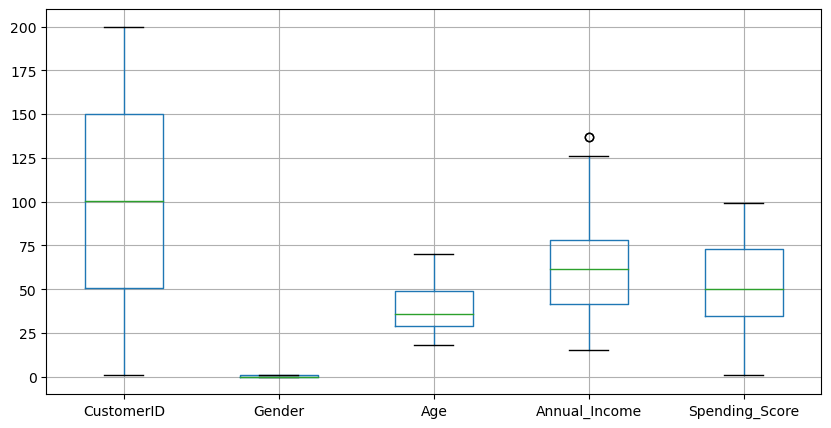

In [10]:
plt.figure(figsize=(10,5))
df.boxplot()

In [11]:
Q3=df.Annual_Income.quantile(0.75)
Q1=df.Annual_Income.quantile(0.25)
IQR=Q3-Q1

ul=Q3+1.5*IQR
ll=Q1-1.5*IQR
df=df[(df.Annual_Income>ll)&(df.Annual_Income<ul)]


<AxesSubplot:>

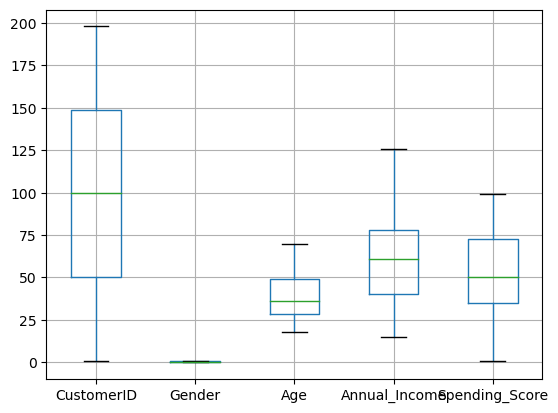

In [12]:
df.boxplot()

In [13]:
df.shape    # 2 rows removed

(198, 5)

<AxesSubplot:xlabel='Annual_Income', ylabel='Density'>

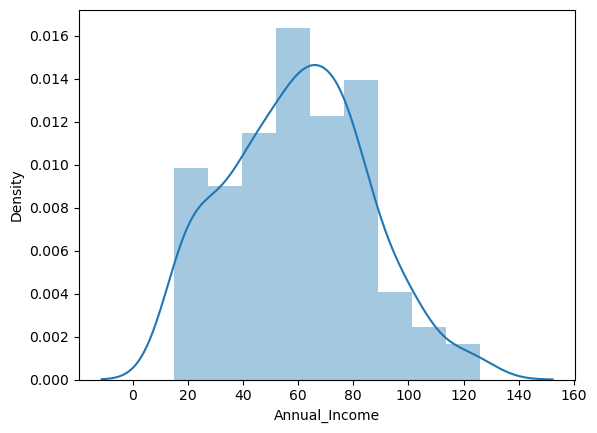

In [14]:
sb.distplot(df.Annual_Income)

<AxesSubplot:xlabel='Spending_Score', ylabel='Density'>

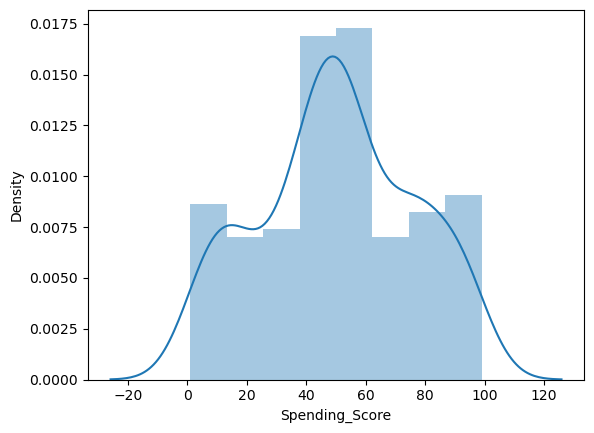

In [15]:
sb.distplot(df.Spending_Score)

In [16]:
# clustring based on annula_income and spending_score
x=df[["Annual_Income","Spending_Score"]]
x.head()

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Text(0.5, 1.0, 'Annual_Income v/s Spending_Score')

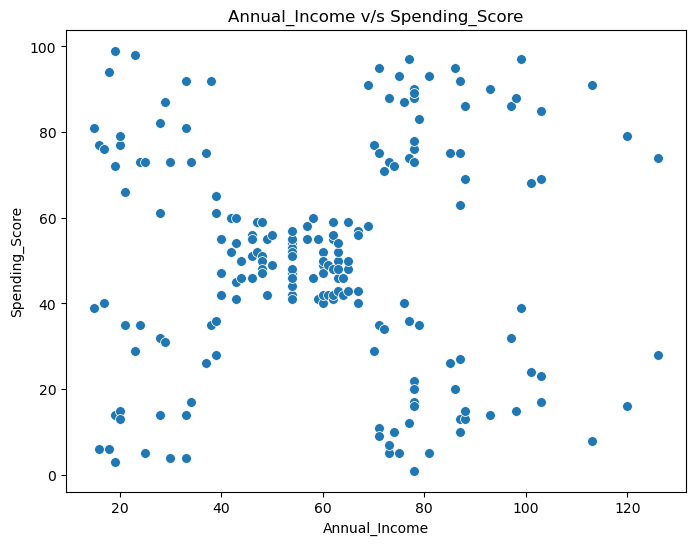

In [17]:
plt.figure(figsize=(8,6))
sb.scatterplot(x="Annual_Income",y="Spending_Score",data=x,s=50)
plt.xlabel("Annual_Income")
plt.ylabel("Spending_Score")
plt.title("Annual_Income v/s Spending_Score")

In [18]:
# elbow method--to find n.o of clusters

from sklearn.cluster import KMeans

wcss=[]
for i in range(1,10):
    km=KMeans(n_clusters=i)
    km.fit(x)
    wcss.append(km.inertia_)


In [51]:
wcss

[256064.40909090912,
 171074.2536764706,
 101166.23927650374,
 68497.65525388089,
 39345.27707732771,
 33830.090384563555,
 28373.352213378024,
 23284.394083694086,
 20067.44034363569]

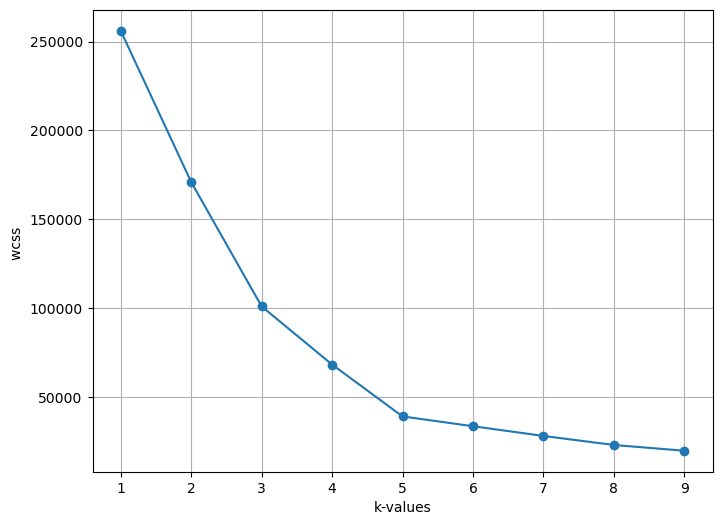

In [20]:
plt.figure(figsize=(8,6))
plt.plot(range(1,10),wcss,marker='o')
plt.xlabel("k-values")
plt.ylabel("wcss ")
plt.grid()

In [21]:
# taking k=5
model=KMeans(n_clusters=5)
model.fit(x)

KMeans(n_clusters=5)

In [22]:
pred=model.predict(x)
df['cluster']=pred
df

,CustomerID,Gender,Age,Annual_Income,Spending_Score,cluster
0,1,1,19,15,39,2
1,2,1,21,15,81,0
2,3,0,20,16,6,2
3,4,0,23,16,77,0
4,5,0,31,17,40,2
...,...,...,...,...,...,...
193,194,0,38,113,91,3
194,195,0,47,120,16,4
195,196,0,35,120,79,3
196,197,0,45,126,28,4


from sklearn.metrics import silhouette_score     # score
score=silhouette_score(x,model.labels_,metric="euclidean")
score

silhouettescore=(p−q)/max(p,q)
p= inter-cluster distance
q= intra-cluster distance

# +1 score -samples are far away from the other clusters
# 0 score -sampels are  very close to the other decison boundarys (clusters)
# -1 score -samples are wrongly assigned to other clusters

In [23]:
df.cluster.unique()

array([2, 0, 1, 3, 4])

In [24]:
model.cluster_centers_

array([[25.72727273, 79.36363636],
       [55.0875    , 49.7125    ],
       [26.30434783, 20.91304348],
       [85.21052632, 82.10526316],
       [86.34285714, 17.57142857]])

Text(0.5, 1.0, 'Annual_Income v/s Spending_Score')

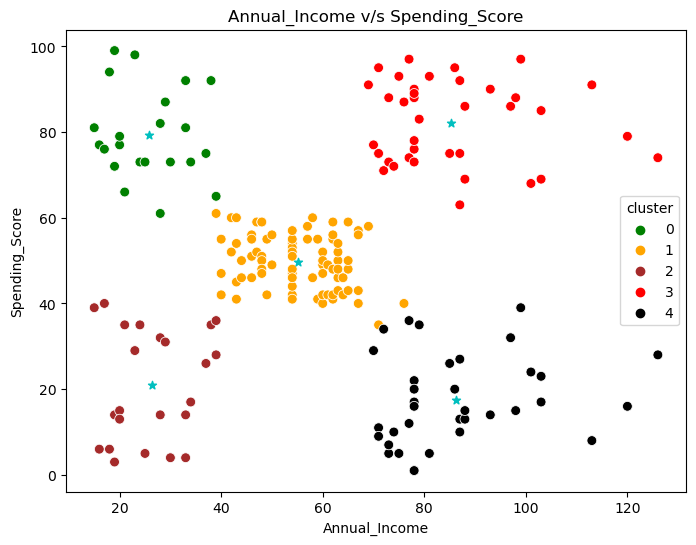

In [25]:
plt.figure(figsize=(8,6))
sb.scatterplot(x="Annual_Income",y="Spending_Score",
               data=df,s=50,legend="full",hue="cluster",
               palette=["green","orange","brown","red","black"])
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],marker="*",c="c")
plt.xlabel("Annual_Income")
plt.ylabel("Spending_Score")
plt.title("Annual_Income v/s Spending_Score")

In [26]:
df

,CustomerID,Gender,Age,Annual_Income,Spending_Score,cluster
0,1,1,19,15,39,2
1,2,1,21,15,81,0
2,3,0,20,16,6,2
3,4,0,23,16,77,0
4,5,0,31,17,40,2
...,...,...,...,...,...,...
193,194,0,38,113,91,3
194,195,0,47,120,16,4
195,196,0,35,120,79,3
196,197,0,45,126,28,4


[Text(0, 0, '22'),
 Text(0, 0, '80'),
 Text(0, 0, '23'),
 Text(0, 0, '38'),
 Text(0, 0, '35')]

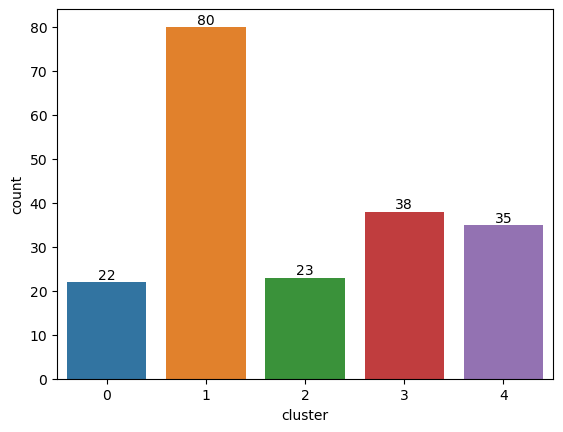

In [27]:
fig=sb.countplot(x="cluster",data=df)
fig.bar_label(fig.containers[0])  

In [28]:
cg1=df[df["cluster"]==0]
print('no of customers in 1st :',len(cg1))
print("the cusotmers in the group are :",cg1['CustomerID'].values)

no of customers in 1st : 22
the cusotmers in the group are : [ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 46]


In [29]:

c1=df.loc[[2,4  ,6  ,8, 10, 12, 14, 16, 18, 20, 22, 24 ,26, 28, 30, 32, 34, 36 ,38 ,40, 42, 46],["Annual_Income","Spending_Score"]]
c1.sort_values(by="Annual_Income")

,Annual_Income,Spending_Score
2,16,6
4,17,40
6,18,6
8,19,3
10,19,14
12,20,15
14,20,13
16,21,35
18,23,29
20,24,35


In [30]:
cg2=df[df["cluster"]==1]
print('no of customers in 2nd :',len(cg2))
print("the cusotmers in the group are :",cg2['CustomerID'].values)

no of customers in 2nd : 80
the cusotmers in the group are : [ 44  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 127 143]


In [31]:
c2=df.loc[[ 44,  47 , 48,  49,  50,  51,  52, 53,  54,  55 , 56 , 57,  58,  59,  60,  61,  62 , 63,
  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74 , 75 , 76,  77 , 78 , 79 , 80,  81,
  82 , 83 , 84 , 85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96 , 97 , 98,  99,
 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114 ,115, 116, 117,
 118, 119, 120, 121, 122, 123, 127, 143],["Annual_Income","Spending_Score"]]
c2.sort_values(by="Spending_Score")

,Annual_Income,Spending_Score
44,39,28
121,67,40
93,60,40
82,54,41
91,59,41
...,...,...
88,58,60
51,42,60
143,76,87
123,69,91


In [32]:
cg3=df[df["cluster"]==2]
print('no of customers in 1st :',len(cg3))
print("the cusotmers in the group are :",cg3['CustomerID'].values)

no of customers in 1st : 23
the cusotmers in the group are : [ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45]


In [33]:

c3=df.loc[[ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45],["Annual_Income","Spending_Score"]]
c3.sort_values(by="Spending_Score")

,Annual_Income,Spending_Score
27,28,61
43,39,61
45,39,65
17,21,66
9,19,72
37,34,73
31,30,73
21,24,73
23,25,73
39,37,75


In [34]:
cg4=df[df["cluster"]==3]
print('no of customers in 1st :',len(cg4))
print("the cusotmers in the group are :",cg4['CustomerID'].values)

no of customers in 1st : 38
the cusotmers in the group are : [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194
 196 198]


In [35]:

c4=df.loc[[125, 129, 131, 133, 135, 137, 139, 141, 145, 147, 149, 151, 153, 155, 157, 159, 161, 163,
 165, 167, 169, 171, 173, 175, 177, 179, 181, 183, 185, 187, 189, 191, 193, 195, 197],["Annual_Income","Spending_Score"]]
c4.sort_values(by="Spending_Score")

,Annual_Income,Spending_Score
169,87,63
187,101,68
191,103,69
177,88,69
133,72,71
139,74,72
137,73,73
159,78,73
197,126,74
147,77,74


In [36]:
cg5=df[df["cluster"]==4]
print('no of customers in 1st :',len(cg5))
print("the cusotmers in the group are :",cg5['CustomerID'].values)

no of customers in 1st : 35
the cusotmers in the group are : [125 129 131 133 135 137 139 141 145 147 149 151 153 155 157 159 161 163
 165 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195 197]


In [37]:
c5=df.loc[[124, 126, 128, 130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154, 156, 158,
 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180, 182, 184, 186, 188, 190, 192, 194,
 196],["Annual_Income","Spending_Score"]]
c5.sort_values(by="Spending_Score")

,Annual_Income,Spending_Score
158,78,1
156,78,1
134,73,5
140,75,5
162,81,5
136,73,7
192,113,8
130,71,9
138,74,10
172,87,10


 dividing the customers based on thier customerID
customer_group=[0,1,2,3,4]
for i in range(0,5):
    customer_group[i]=df[df['cluster']==i]
    print("no of customers in group",i,len(customer_group[i]))
    print("The ID of the customers in the group :",customer_group['CustomerID'].values)

In [38]:
df.describe()

,CustomerID,Gender,Age,Annual_Income,Spending_Score,cluster
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,99.500000,0.434343,38.929293,59.787879,50.196970,1.919192
std,57.301832,0.496927,14.016852,25.237259,25.746846,1.322793
min,1.000000,0.000000,18.000000,15.000000,1.000000,0.000000
25%,50.250000,0.000000,28.250000,40.500000,35.000000,1.000000
50%,99.500000,0.000000,36.000000,61.000000,50.000000,1.000000
75%,148.750000,1.000000,49.000000,77.750000,72.750000,3.000000
max,198.000000,1.000000,70.000000,126.000000,99.000000,4.000000
